Default hyperparameters:
Cross validation R2 train scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cross validation R2 test scores:  [0.52380902 0.04459177 0.56924522 0.69444655 0.67431662 0.61173366
 0.63020115 0.41124596 0.2958798  0.26344347]
Cross validation root mean squared error train scores:  [0.00000000e+00 4.41634125e-15 0.00000000e+00 4.41190494e-15
 0.00000000e+00 4.41190494e-15 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.41190494e-15]
Cross validation root mean squared error test scores:  [48.09947757 77.74273303 55.79867577 45.67504668 40.97654362 51.8139549
 42.96933992 58.7608363  85.78480926 81.18908841]


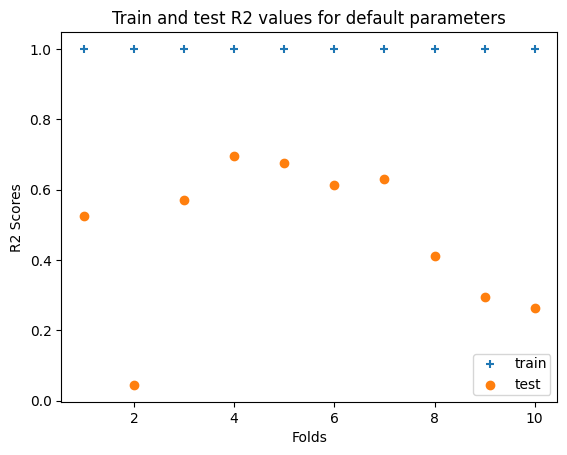

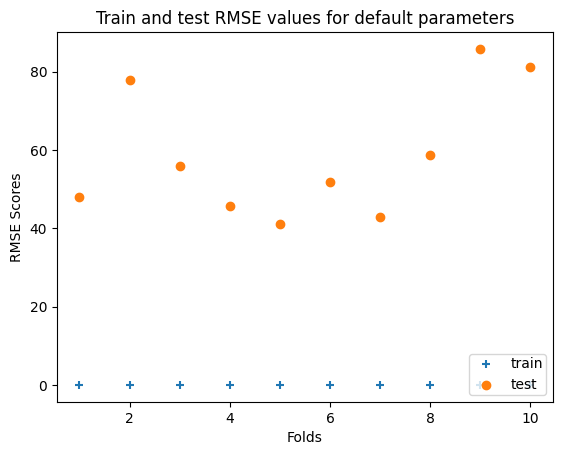

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
# column names for independent features
independent_columns = [
    "normalising_temperature", 
    "tempering_temperature",
    "percent_silicon",
    "percent_chromium",
    "percent_copper",
    "percent_nickel",
    "percent_sulphur",
    "percent_carbon",
    "percent_manganese"
]
# column names for the target variable
dependent_column = "tensile_strength"
# Read steel.csv file into steel_data
steel_data = pd.read_csv("steel.csv")
# independent features on x-axis, target value on y-axis
x_independent = steel_data.loc[:,independent_columns]
y_target_value = steel_data.loc[:,dependent_column]


# List of max_depth values from 1 - 10 in jumps of 1
max_depth = list(range(1,11,1))
# List of max_depth values from 1 - 10 in jumps of 1
min_samples_split = list(range(2,12,1))

r2_values_defalut_train = []
r2_values_defalut_test = []
rmse_values_default_train = []
rmse_values_default_test = []

# Helper list for the number of folds
barchar_x_axis_range = np.arange(1,11)
# DecisionTreeRegressor run with default hyperparameters trained with 10 fold cross validation
print("Default hyperparameters:")
decisionTreeRegressor = DecisionTreeRegressor()
# get the R2 metrics scores
cross_validation_scores = cross_validate(decisionTreeRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="r2")
r2_values_defalut_train = cross_validation_scores["train_score"]
r2_values_defalut_test = cross_validation_scores["test_score"]
print("Cross validation R2 train scores: ", r2_values_defalut_train)
print("Cross validation R2 test scores: ", r2_values_defalut_test)
# get the mean squared error metrics scores and covert them to root mean squared error
cross_validation_scores = cross_validate(decisionTreeRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
rmse_values_default_train = np.sqrt(np.abs(cross_validation_scores["train_score"]))
rmse_values_default_test = np.sqrt(np.abs(cross_validation_scores["test_score"]))
print("Cross validation root mean squared error train scores: ", rmse_values_default_train)
print("Cross validation root mean squared error test scores: ", rmse_values_default_test)

# Plot r2 values for the default hyperparameter selection for train and test data
plt.title("Train and test R2 values for default parameters")
plt.scatter(barchar_x_axis_range,r2_values_defalut_train,marker="+")
plt.scatter(barchar_x_axis_range,r2_values_defalut_test,marker="o")
legend_labels = ["train","test"]
plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
plt.xlabel("Folds")
plt.ylabel("R2 Scores")
plt.show()

# Plot rmse values for the default hyperparameter selection for train and test data
plt.title("Train and test RMSE values for default parameters")
plt.scatter(barchar_x_axis_range,rmse_values_default_train,marker="+")
plt.scatter(barchar_x_axis_range,rmse_values_default_test,marker="o")
legend_labels = ["train","test"]
plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
plt.xlabel("Folds")
plt.ylabel("RMSE Scores")
plt.show()

testing the algorithm behaviour with default min_samples_split but changing the max_depth


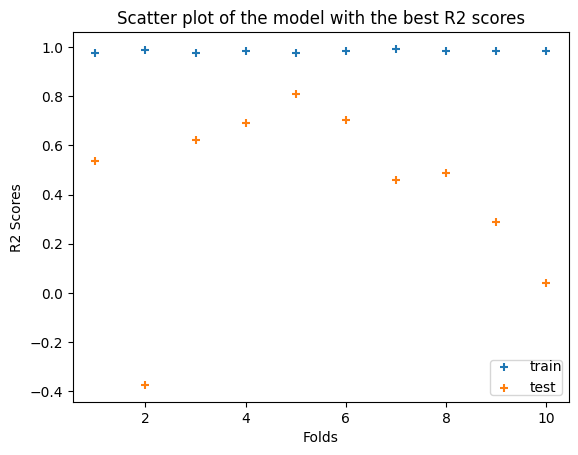

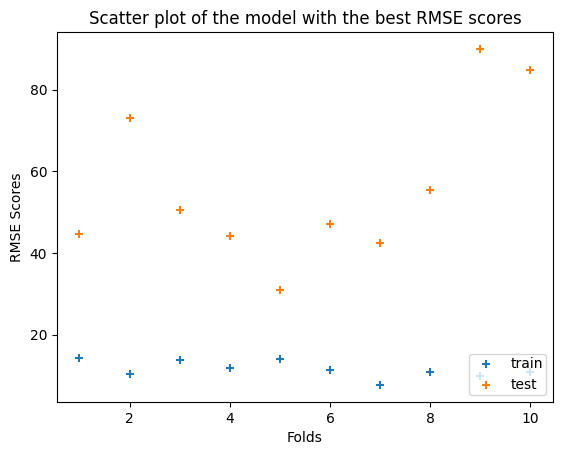

Testing the algorithm behaviour with default max_depth but changing the min_samples_split


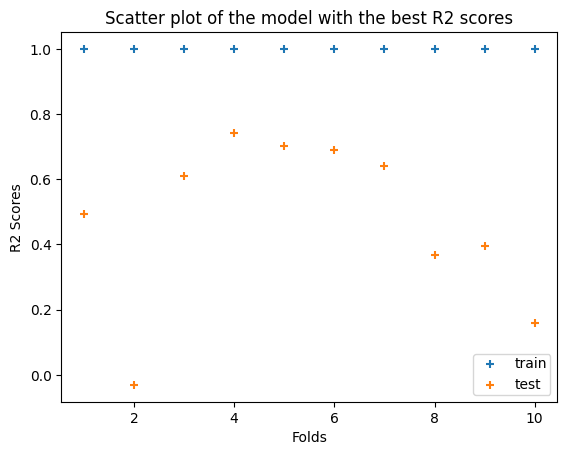

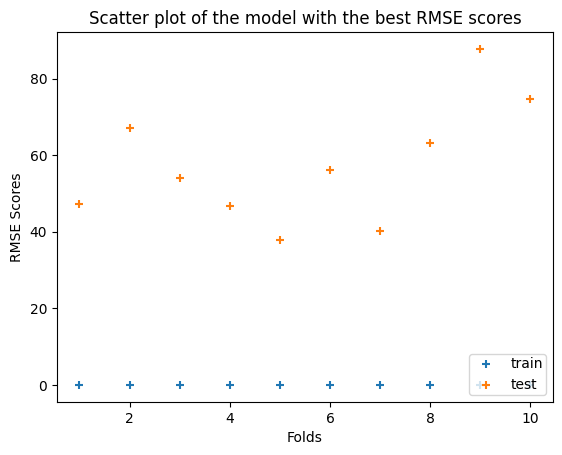

In [2]:
print("testing the algorithm behaviour with default min_samples_split but changing the max_depth")
default_min_samples_split_r2_train_values = []
default_min_samples_split_r2_test_values = []
default_min_samples_split_rmse_train_values = []
default_min_samples_split_rmse_test_values = []
# use 10 - fold cv and train the decision tree regressor with different max_depth values but keeping the min_samples_split at default 
for i in range(len(max_depth)):
    decisionTreeRegressor = DecisionTreeRegressor(max_depth=max_depth[i])
    cross_validation_scores = cross_validate(decisionTreeRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="r2")
    default_min_samples_split_r2_train_values.append(cross_validation_scores["train_score"])
    default_min_samples_split_r2_test_values.append(cross_validation_scores["test_score"])
    # get the mean squared error metrics scores and covert them to root mean squared error
    cross_validation_scores = cross_validate(decisionTreeRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
    default_min_samples_split_rmse_train_values.append(np.sqrt(np.abs(cross_validation_scores["train_score"])))
    default_min_samples_split_rmse_test_values.append(np.sqrt(np.abs(cross_validation_scores["test_score"])))

    
    
# plot a scatter plot of the r2 values over 10 folds for each of the model trained above    
plt.title("Scatter plot of the model with the best R2 scores")    
np_array = np.array(default_min_samples_split_r2_train_values)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
plt.scatter(max_depth,default_min_samples_split_r2_train_values[max_index[0]],marker="+")
np_array = np.array(default_min_samples_split_r2_test_values)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
plt.scatter(max_depth,default_min_samples_split_r2_test_values[max_index[0]],marker="+")
legend_labels = ["train","test"]
plt.legend(labels=legend_labels, loc=4, borderpad=0)
plt.xlabel("Folds")
plt.ylabel("R2 Scores")
plt.show()    

# plot a scatter plot of the rmse values over 10 folds for each of the model trained above    
plt.title("Scatter plot of the model with the best RMSE scores")    
np_array = np.array(default_min_samples_split_rmse_train_values)
lowest_index = np.unravel_index(np_array.argmin(), np_array.shape)
plt.scatter(max_depth,default_min_samples_split_rmse_train_values[lowest_index[0]],marker="+")
np_array = np.array(default_min_samples_split_rmse_test_values)
lowest_index = np.unravel_index(np_array.argmin(), np_array.shape)
plt.scatter(max_depth,default_min_samples_split_rmse_test_values[lowest_index[0]],marker="+")
legend_labels = ["train","test"]
plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
plt.xlabel("Folds")
plt.ylabel("RMSE Scores")
plt.show()    


print("Testing the algorithm behaviour with default max_depth but changing the min_samples_split")
default_weighting_scheme_r2_train_values = []
default_weighting_scheme_r2_test_values = []
default_weighting_scheme_rmse_train_values = []
default_weighting_scheme_rmse_test_values = []

# use 10 - fold cv and train the knn regressor with different min_samples_split but keeping the max_depth at default 
for i in range(len(min_samples_split)):
    decisionTreeRegressor = DecisionTreeRegressor(min_samples_split=min_samples_split[i])
    cross_validation_scores = cross_validate(decisionTreeRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="r2")
    default_weighting_scheme_r2_train_values.append(cross_validation_scores["train_score"])
    default_weighting_scheme_r2_test_values.append(cross_validation_scores["test_score"])
    # get the mean squared error metrics scores and covert them to root mean squared error
    cross_validation_scores = cross_validate(decisionTreeRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
    default_weighting_scheme_rmse_train_values.append(np.sqrt(np.abs(cross_validation_scores["train_score"])))
    default_weighting_scheme_rmse_test_values.append(np.sqrt(np.abs(cross_validation_scores["test_score"])))

# plot a scatter plot of the r2 values over 10 folds for each of the model trained above    
plt.title("Scatter plot of the model with the best R2 scores")    
np_array = np.array(default_weighting_scheme_r2_train_values)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
plt.scatter(max_depth,default_weighting_scheme_r2_train_values[max_index[0]],marker="+")
np_array = np.array(default_weighting_scheme_r2_test_values)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
plt.scatter(max_depth,default_weighting_scheme_r2_test_values[max_index[0]],marker="+")
legend_labels = ["train","test"]
plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
plt.xlabel("Folds")
plt.ylabel("R2 Scores")
plt.show()    

# plot a scatter plot of the rmse values over 10 folds for each of the model trained above    
plt.title("Scatter plot of the model with the best RMSE scores")    
np_array = np.array(default_weighting_scheme_rmse_train_values)
lowest_index = np.unravel_index(np_array.argmin(), np_array.shape)
plt.scatter(max_depth,default_weighting_scheme_rmse_train_values[lowest_index[0]],marker="+")
np_array = np.array(default_weighting_scheme_rmse_test_values)
lowest_index = np.unravel_index(np_array.argmin(), np_array.shape)
plt.scatter(max_depth,default_weighting_scheme_rmse_test_values[lowest_index[0]],marker="+")
legend_labels = ["train","test"]
plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
plt.xlabel("Folds")
plt.ylabel("RMSE Scores")
plt.show()    

In [3]:
# lists of scores and models
list_of_r2_scores_train = []
list_of_r2_scores_test = []
list_of_rmse_scores_train = []
list_of_rmse_scores_test = []
for i in range(len(max_depth)):
    for j in range(len(min_samples_split)):
        # define the DecisionTreeRegressor with its hyperparameters for different max_weights and different min_samples_split
        decisionTreeRegressor = DecisionTreeRegressor(max_depth=max_depth[j], min_samples_split=min_samples_split[i])
        cross_validation_scores = cross_validate(decisionTreeRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="r2")
        list_of_r2_scores_train.append(cross_validation_scores["train_score"].mean())
        list_of_r2_scores_test.append(cross_validation_scores["test_score"].mean())
        # get the the average value of all ten folds for this model get the mean squared error metrics scores  of these average values and covert these to root mean squared error
        cross_validation_scores = cross_validate(decisionTreeRegressor, x_independent, y_target_value, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
        list_of_rmse_scores_train.append(np.sqrt(np.abs(cross_validation_scores["train_score"].mean())))
        list_of_rmse_scores_test.append(np.sqrt(np.abs(cross_validation_scores["test_score"].mean())))
# Split each list so that it contains 10 sublists each sublits representing a different max_depth with mean values of the 10 - fold CV for every min_samples_split
list_of_r2_scores_train = np.array_split(list_of_r2_scores_train, 10)
list_of_r2_scores_test = np.array_split(list_of_r2_scores_test, 10)
list_of_rmse_scores_train = np.array_split(list_of_rmse_scores_train, 10)
list_of_rmse_scores_test = np.array_split(list_of_rmse_scores_test, 10)



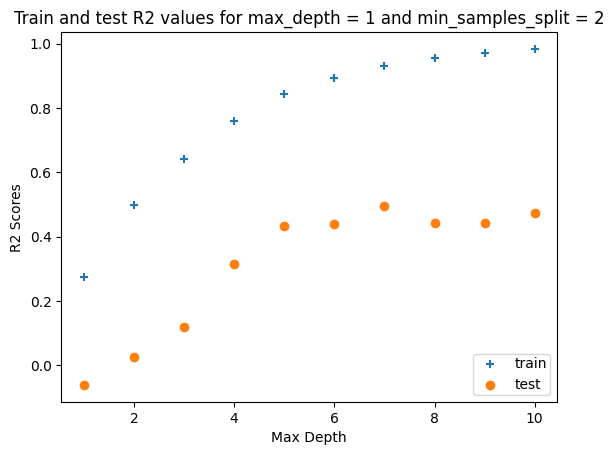

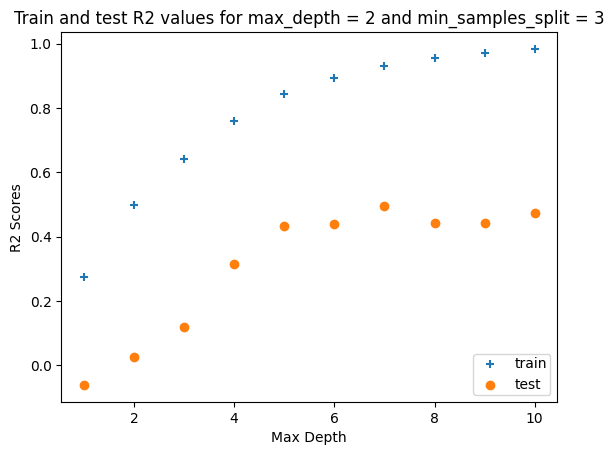

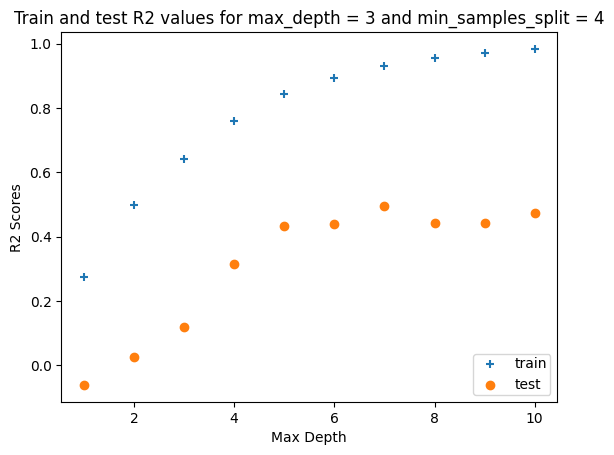

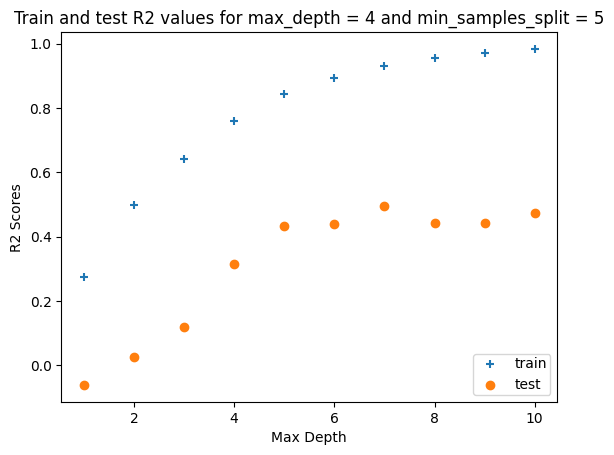

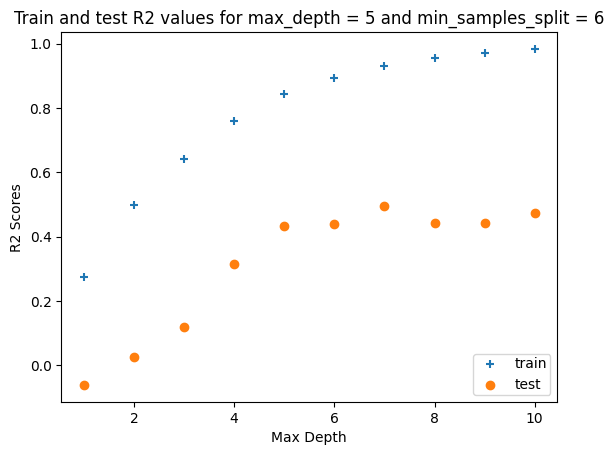

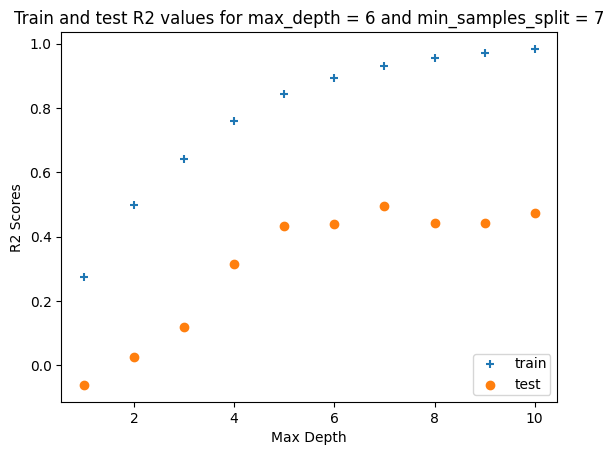

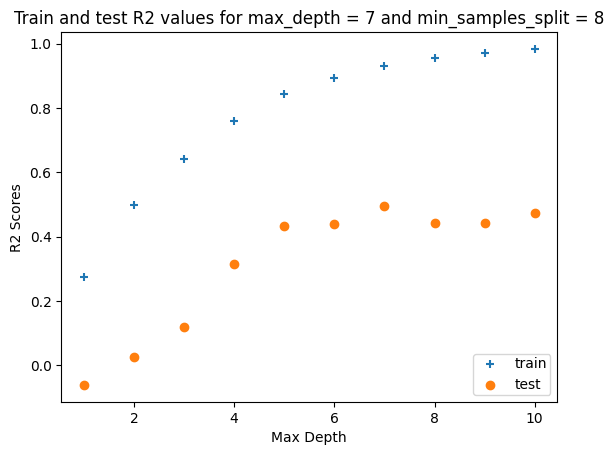

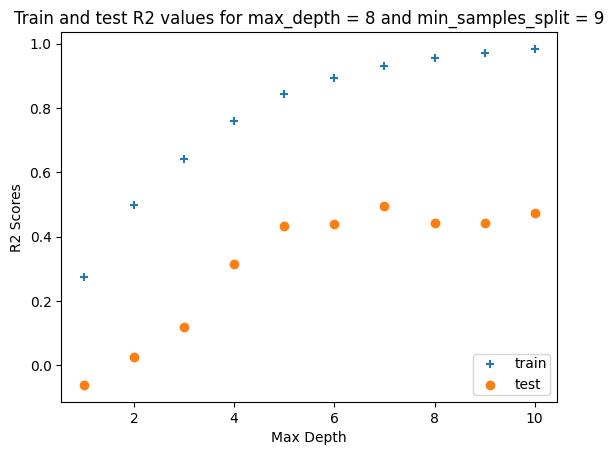

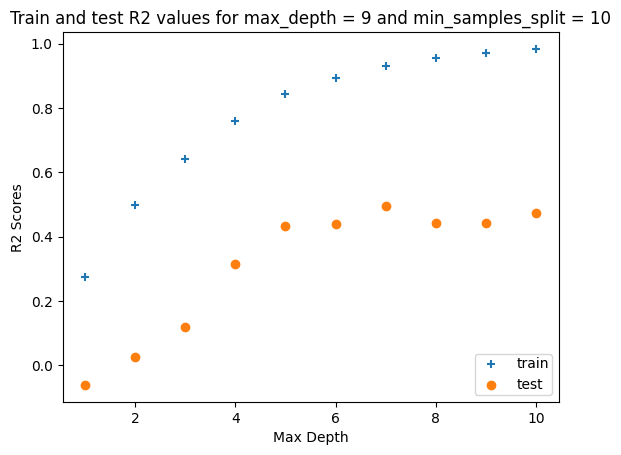

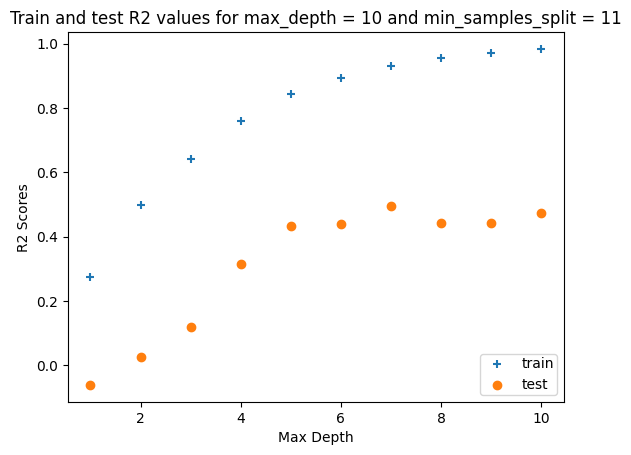

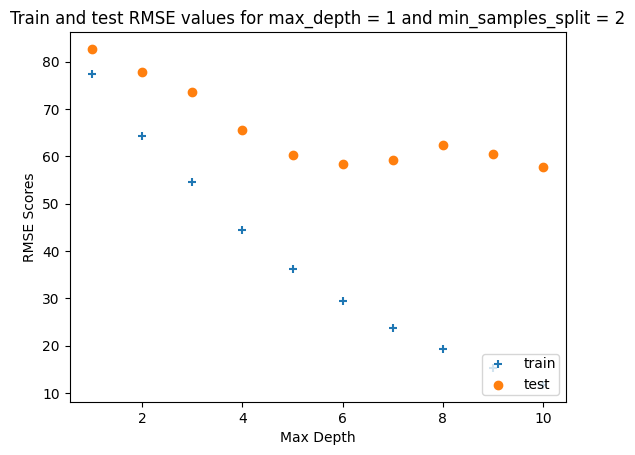

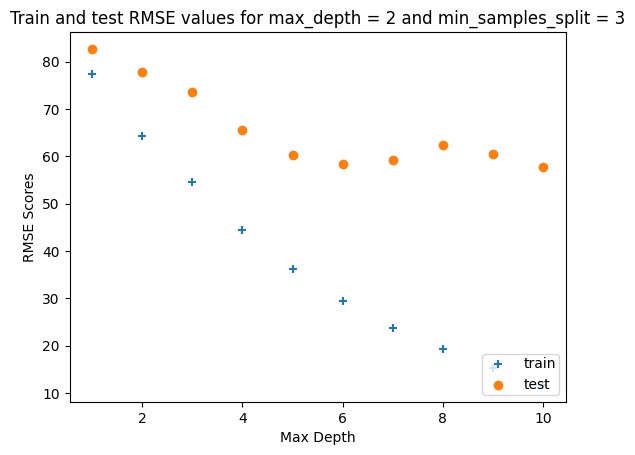

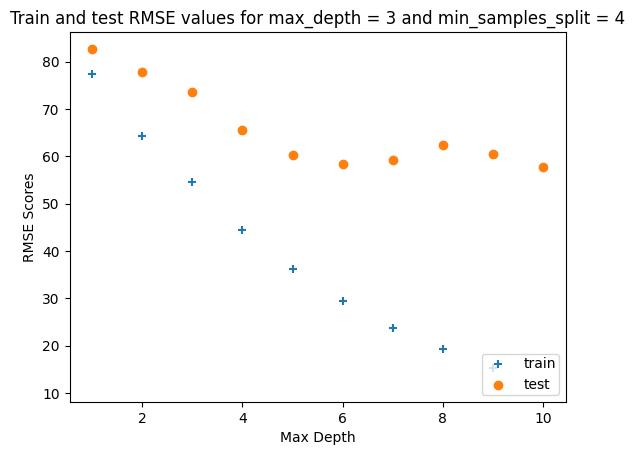

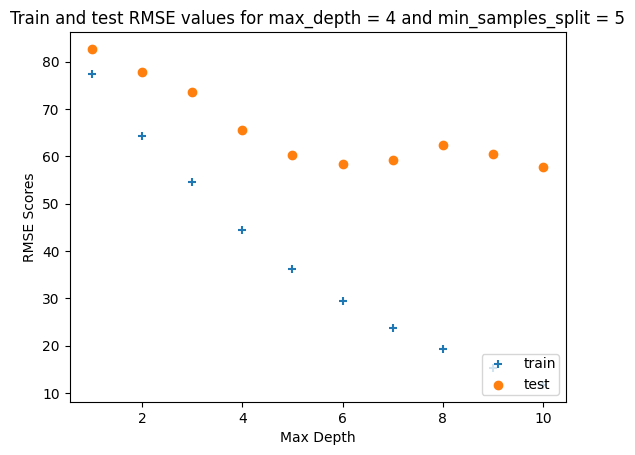

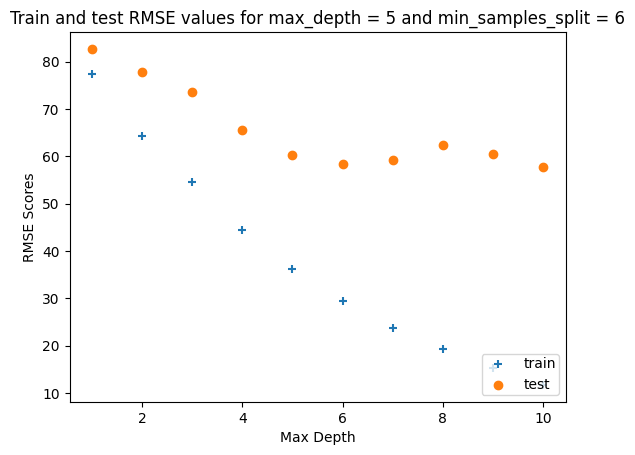

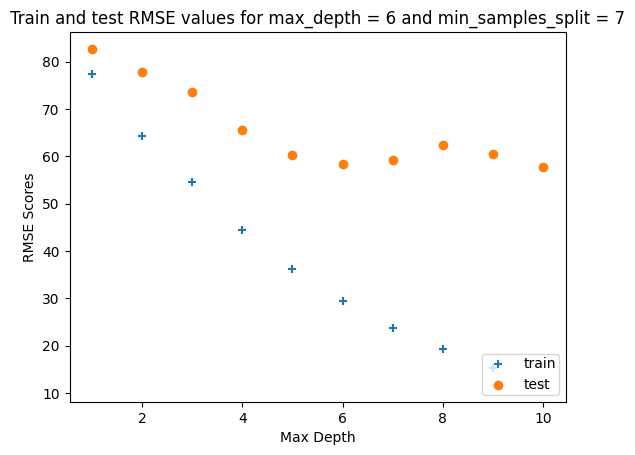

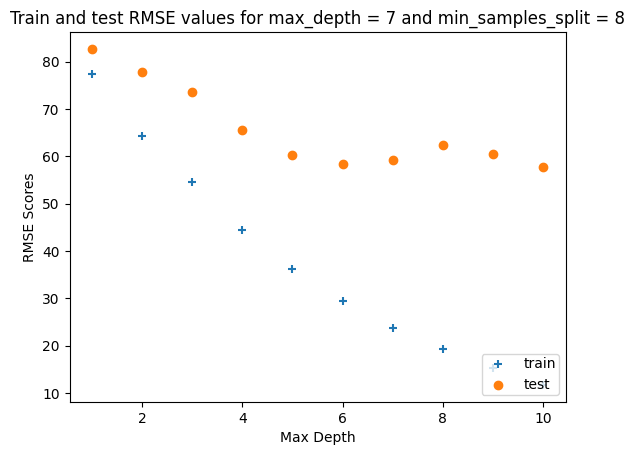

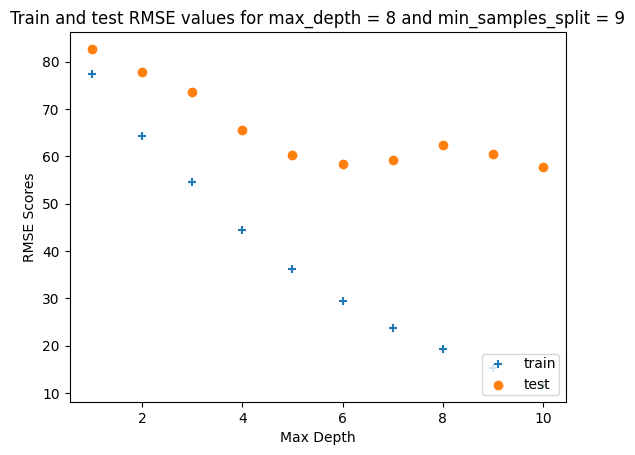

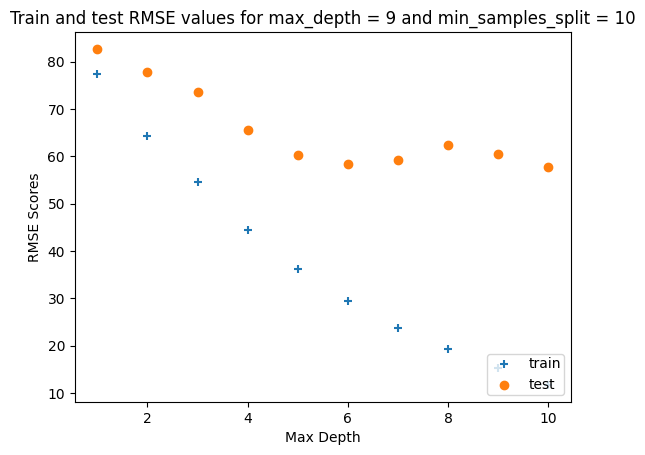

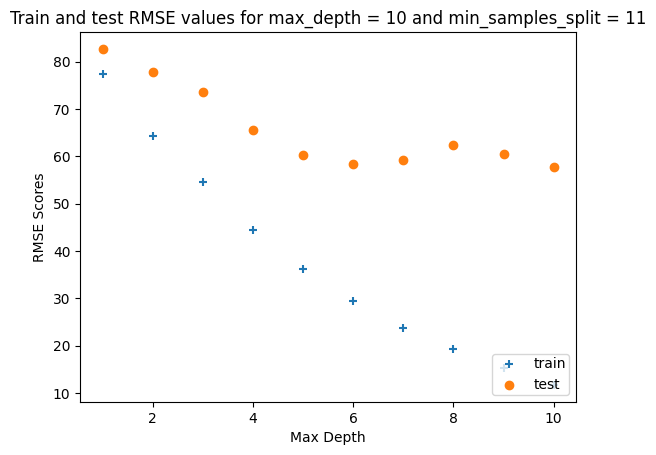

In [4]:
# Compare the r2 and rsme scores of the models
for i in range(len(max_depth)):
    plt.title("Train and test R2 values for max_depth = " + str(i+1) + " and min_samples_split = " + str(i+2))
    plt.scatter(max_depth,list_of_r2_scores_train[0],marker="+")
    plt.scatter(max_depth,list_of_r2_scores_test[0],marker="o")
    legend_labels = ["train","test"]
    plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
    plt.xlabel("Max Depth")
    plt.ylabel("R2 Scores")
    plt.show()

# Compare the rmse and rsme scores of the models
for i in range(len(max_depth)):
    plt.title("Train and test RMSE values for max_depth = " + str(i+1) +  " and min_samples_split = " + str(i+2))
    plt.scatter(max_depth,list_of_rmse_scores_train[0],marker="+")
    plt.scatter(max_depth,list_of_rmse_scores_test[0],marker="o")
    legend_labels = ["train","test"]
    plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
    plt.xlabel("Max Depth")
    plt.ylabel("RMSE Scores")
    plt.show()

Hyperparameter values: max_depth = 6 min_samples_split = 8


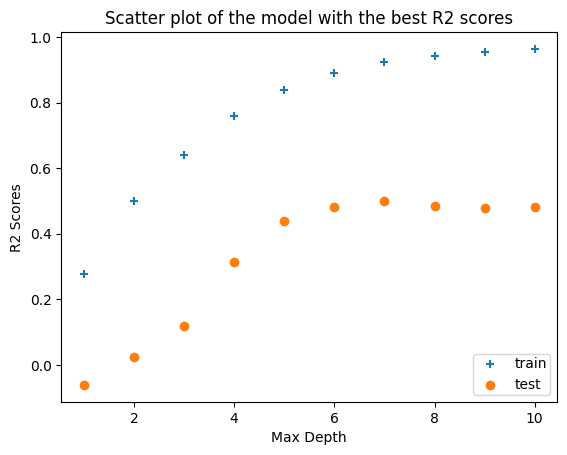

Hyperparameter values: max_depth = 8 min_samples_split = 7


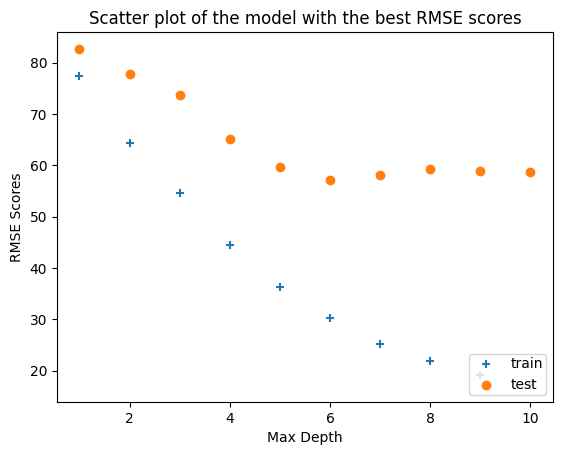

In [5]:
# Finding the model with lowest RMSE and highest R2 for test these models would fit the unseen data the best
plt.title("Scatter plot of the model with the best R2 scores")
# find highest r2 value across the average of 10 folds for this machine model for training data
np_array = np.array(list_of_r2_scores_test)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
print("Hyperparameter values: max_depth =",max_depth[max_index[0]],"min_samples_split =",min_samples_split[max_index[1]]) 
plt.scatter(max_depth,list_of_r2_scores_train[max_index[0]],marker="+")
# find highest r2 value across the average of 10 folds for this machine model for test data
np_array = np.array(list_of_r2_scores_test)
max_index = np.unravel_index(np_array.argmax(), np_array.shape)
plt.scatter(max_depth,list_of_r2_scores_test[max_index[0]],marker="o")
legend_labels = ["train","test"]
plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
plt.xlabel("Max Depth")
plt.ylabel("R2 Scores")
plt.show()

plt.title("Scatter plot of the model with the best RMSE scores")
# find lowest rmse value across the average of 10 folds for this machine model training data
np_array = np.array(list_of_rmse_scores_test)
lowest_index = np.unravel_index(np_array.argmin(), np_array.shape)
print("Hyperparameter values: max_depth =",max_depth[lowest_index[0]],"min_samples_split =",min_samples_split[lowest_index[1]]) 
# find highest rmse value across the average of 10 folds for this machine model for test data
np_array = np.array(list_of_rmse_scores_train)
lowest_index = np.unravel_index(np_array.argmin(), np_array.shape)
plt.scatter(max_depth,list_of_rmse_scores_train[max_index[0]],marker="+")
np_array = np.array(list_of_rmse_scores_test)
max_index = np.unravel_index(np_array.argmin(), np_array.shape)
plt.scatter(max_depth,list_of_rmse_scores_test[max_index[0]],marker="o")
legend_labels = ["train","test"]
plt.legend(labels=legend_labels, loc=4, borderpad=0.2)
plt.xlabel("Max Depth")
plt.ylabel("RMSE Scores")
plt.show()